In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonmean
from funzioni import plot_zonmean_2_cluster
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_95cl
from funzioni import plot_bs_95cl_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random

Caricamento file pickle

In [2]:
# Caricamento di models_atmos e models_zonmean
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
#with open('models_zonmean.pkl','rb') as file:
#    models_zonmean = dill.load(file)
#    era_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)
# Caricamento di models_atmos e models_zonmean
with open('models_ua.pkl','rb') as file:
    models_ua = dill.load(file)
    era_ua_seas_mean= dill.load(file)
with open('models_ta.pkl','rb') as file:
    models_ta = dill.load(file)
    dataset_ERA_ta = dill.load(file)
    era_ta_seas_mean = dill.load(file)
    dict_egr_era = dill.load(file) #dizionario di ERA5_ta per il calcolo di egr

In [3]:
# Salvataggio in un file Pickle
with open('bootstrap_egr.pickle', 'rb') as f: #'rb' = read binary
    array_2th_cluster0 = pickle.load(f) #cluster0
    array_97th_cluster0 = pickle.load(f) #cluster0
    array_mean_cluster0_egr= pickle.load(f) #cluster0
    array_std_cluster0 = pickle.load(f) #cluster0
    matrix10_cluster0_egr = pickle.load(f) #cluster0
    diff_cluster0_egr = pickle.load(f)

    array_2th_cluster1 = pickle.load(f) #cluster1
    array_97th_cluster1 = pickle.load(f) #cluster1
    array_mean_cluster1_egr= pickle.load(f) #cluster1
    array_std_cluster1 = pickle.load(f) #cluster1
    matrix10_cluster1_egr = pickle.load(f) #cluster1
    diff_cluster1_egr = pickle.load(f)

    array_2th_cluster2 = pickle.load(f) #cluster2
    array_97th_cluster2 = pickle.load(f) #cluster2
    array_mean_cluster2_egr= pickle.load(f) #cluster2
    array_std_cluster2 = pickle.load(f) #cluster2
    matrix10_cluster2_egr = pickle.load(f) #cluster2
    diff_cluster2_egr = pickle.load(f)

    array_2th_cluster3 = pickle.load(f) #cluster3
    array_97th_cluster3 = pickle.load(f) #cluster3
    array_mean_cluster3_egr= pickle.load(f) #cluster3
    array_std_cluster3 = pickle.load(f) #cluster3
    matrix10_cluster3_egr = pickle.load(f) #cluster3
    diff_cluster3_egr = pickle.load(f)

In [4]:
# Caricamento di models e models_atmos
with open('models.pkl', 'rb') as file:
    models = dill.load(file)
    esa_na_seas_mean_tos = dill.load(file)
with open('models_zonmean.pkl','rb') as file:
    models_zonmean = dill.load(file)
    era_seas_mean = dill.load(file)
#Caricamento dei file pickle di modelli_tos
with open('modelli_tos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0_pca = pickle.load(f)
    list_cluster1_pca = pickle.load(f)
    list_cluster2_pca = pickle.load(f)
    list_cluster3_pca = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    cluster_0_pdf = pickle.load(f)
    cluster_1_pdf = pickle.load(f)
    cluster_2_pdf = pickle.load(f)
    cluster_3_pdf = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    cluster_0_mean_pdf = pickle.load(f)
    cluster_1_mean_pdf = pickle.load(f)
    cluster_2_mean_pdf = pickle.load(f)
    cluster_3_mean_pdf = pickle.load(f)
with open('modelli_zonmean.pickle','rb') as f:
    #Caricamento dei 5 cluster in formato pdf
    zonmean_cluster0 = pickle.load(f)
    zonmean_cluster1 = pickle.load(f)
    zonmean_cluster2 = pickle.load(f)
    zonmean_cluster3 = pickle.load(f)
    #Caricamento dei cluster medi in formato pdf
    zonmean_cluster0_mean = pickle.load(f)
    zonmean_cluster1_mean = pickle.load(f)
    zonmean_cluster2_mean = pickle.load(f)
    zonmean_cluster3_mean = pickle.load(f)

In [5]:
# Salvataggio in un file Pickle
with open('bootstrap.pickle', 'rb') as f: #'rb' = read binary
    array_2th_cluster0 = pickle.load(f) #cluster0
    array_97th_cluster0 = pickle.load(f) #cluster0
    array_mean_cluster0= pickle.load(f) #cluster0
    array_std_cluster0 = pickle.load(f) #cluster0
    matrix10_cluster0 = pickle.load(f) #cluster0
    diff_cluster0 = pickle.load(f)
    
    array_2th_cluster1 = pickle.load(f) #cluster1
    array_97th_cluster1 = pickle.load(f) #cluster1
    array_mean_cluster1= pickle.load(f) #cluster1
    array_std_cluster1 = pickle.load(f) #cluster1
    matrix10_cluster1 = pickle.load(f) #cluster1
    diff_cluster1 = pickle.load(f)

    array_2th_cluster2 = pickle.load(f) #cluster2
    array_97th_cluster2 = pickle.load(f) #cluster2
    array_mean_cluster2= pickle.load(f) #cluster2
    array_std_cluster2 = pickle.load(f) #cluster2
    matrix10_cluster2 = pickle.load(f) #cluster2
    diff_cluster2 = pickle.load(f)

    array_2th_cluster3 = pickle.load(f) #cluster3
    array_97th_cluster3 = pickle.load(f) #cluster3
    array_mean_cluster3= pickle.load(f) #cluster3
    array_std_cluster3 = pickle.load(f) #cluster3
    matrix10_cluster3 = pickle.load(f) #cluster3
    diff_cluster3 = pickle.load(f)

In [6]:
# Salvataggio in un file Pickle
with open('bootstrap_zonmean.pickle', 'rb') as f: #'rb' = read binary
    array_2th_cluster0_zonmean = pickle.load(f) #cluster0
    array_97th_cluster0_zonmean = pickle.load(f) #cluster0
    array_mean_cluster0_zonmean = pickle.load(f) #cluster0
    array_std_cluster0_zonmean = pickle.load(f) #cluster0
    matrix10_cluster0_zonmean = pickle.load(f) #cluster0
    diff_cluster0_zonmean = pickle.load(f)
    
    array_2th_cluster1_zonmean = pickle.load(f) #cluster1
    array_97th_cluster1_zonmean = pickle.load(f) #cluster1
    array_mean_cluster1_zonmean = pickle.load(f) #cluster1
    array_std_cluster1_zonmean = pickle.load(f) #cluster1
    matrix10_cluster1_zonmean = pickle.load(f) #cluster1
    diff_cluster1_zonmean = pickle.load(f)

    array_2th_cluster2_zonmean = pickle.load(f) #cluster2
    array_97th_cluster2_zonmean = pickle.load(f) #cluster2
    array_mean_cluster2_zonmean = pickle.load(f) #cluster2
    array_std_cluster2_zonmean = pickle.load(f) #cluster2
    matrix10_cluster2_zonmean = pickle.load(f) #cluster2
    diff_cluster2_zonmean = pickle.load(f)

    array_2th_cluster3_zonmean = pickle.load(f) #cluster3
    array_97th_cluster3_zonmean = pickle.load(f) #cluster3
    array_mean_cluster3_zonmean = pickle.load(f) #cluster3
    array_std_cluster3_zonmean = pickle.load(f) #cluster3
    matrix10_cluster3_zonmean = pickle.load(f) #cluster3
    diff_cluster3_zonmean = pickle.load(f)

In [7]:
for name in models_zonmean.keys():
    models_zonmean[name]['zonmean seasonal mean DJF'] = models_zonmean[name]['zonmean seasonal mean DJF'].sel(lat=slice(20,80))

In [8]:
list_4_clusters = [list_cluster0,list_cluster1,list_cluster2,list_cluster3]

In [9]:
for name in models_ta.keys():
    models_ta[name]['egr bias DJF'] = models_ta[name]['egr bias DJF'].sel(lat=slice(20,80))

KeyError: 'egr bias DJF'

Plot bias tos

In [10]:
import matplotlib.colors as mcolors

# Define the seismic colormap and modify to have white between 0 and 0.5
seismic_cmap = plt.get_cmap('seismic',12)
colors = seismic_cmap(np.linspace(0,1,12))

# Modify the colormap to have white for the [0, 0.5] range
colors[6] = [1,1,1,1]

# Create the custom colormap
custom_cmap = mcolors.ListedColormap(colors)

# Define custom boundaries
#Zonal wind at 850 hPa and throughout the troposphere --> considering the bias plot
cmap_bounds = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
norm = mcolors.BoundaryNorm(cmap_bounds, custom_cmap.N)

In [11]:
def plot_4_mean_cluster_tos(list_4_clusters,dataset_seas_mean,fig_size,name_dict,title_pdf): #funzione per il plot dei 5 cluster medi di tos
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=fig_size,subplot_kw={"projection": ccrs.PlateCarree()})
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    #calcolo il valor medio
    for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
        #Inizializzo sum_bias per il calcolo della media di tos
        sum_bias = 0
        for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
            model_name = list_4_clusters[j][i]
            sum_bias = sum_bias + name_dict[model_name]['North Atlantic bias DJF']
        #valor medio
        mean_bias_tos = sum_bias / len(list_4_clusters[j])
        mean_bias_tos = mean_bias_tos.assign_coords(lon=(np.where(mean_bias_tos.lon >= 280, mean_bias_tos.lon - 360, mean_bias_tos.lon))) #metto i valori negativi di lon per mean_bias
        #plot
        if j < 2: #primi 3 cluster medi
            k = 0 #indice per le righe --> prima riga
            l = j #indice per le colonne
        else:
            k = 1 #indice per le righe --> seconda riga
            l = k*j - 2  #indice per le colonne --> l appartiene [0,1]
        #plot_mod = ax[k,l].contourf(mean_bias_tos.lon,mean_bias_tos.lat,mean_bias_tos,levels=np.linspace(-5.5,5.5,12),cmap='seismic',add_colorbar=True, extend='both')  #trasformazione cartografica = lonxlat
        plot_mod = ax[k,l].contourf(mean_bias_tos.lon,mean_bias_tos.lat,mean_bias_tos,cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
        data_esa = dataset_seas_mean[4]
        contour_esa = ax[k, l].contour(data_esa.lon, data_esa.lat, data_esa, colors='g')
        ax[k,l].clabel(contour_esa, fmt='%1.1f')
        ax[k,l].coastlines() #gca = get current axis
        #valori assi            
        ax[k,l].set_xticks(np.arange(mean_bias_tos.lon.min(),mean_bias_tos.lon.max(), 20))
        ax[k,l].set_yticks(np.arange(mean_bias_tos.lat.min(),mean_bias_tos.lat.max(), 10))
        ax[k,l].set_ylabel('latitude(deg)',fontsize=12)
        ax[k,l].set_xlabel('longitude(deg)',fontsize=12)
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)
    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ESA-SST-CCI climatology')  
    # Aggiungo la legenda al plot
    fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1) 
    # Titolo
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('SST(°C)')
    #fig.suptitle(title_plot, fontsize=16, y=1.02)
    fig.savefig(title_pdf, format='pdf')

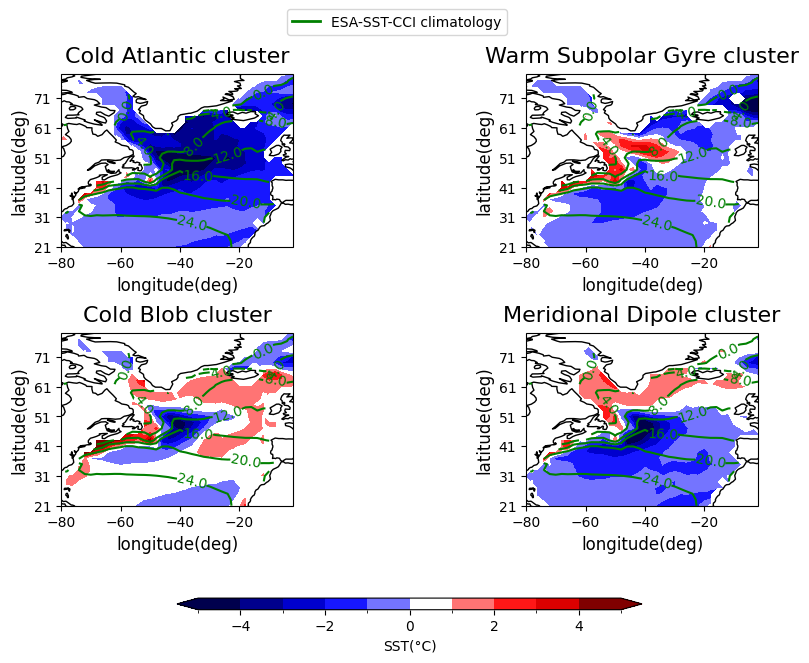

In [12]:
plot_4_mean_cluster_tos(list_4_clusters,esa_na_seas_mean_tos,(10,8),models,'cluster_mean_tos.pdf')

Standard deviation bias tos

In [13]:
def plot_4_std_cluster_tos_bias(list_4_clusters, name_dict, dataset_seas_mean, fig_size):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fig_size, subplot_kw={"projection": ccrs.PlateCarree()})
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Spazi tra le subplots
    

    #    #Calcolo della multi-cluster mean per ogni cluster
#    multi_cluster_mean = []
#    for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
#        sum_mc = 0 #Inizializzo la somma per il calcolo della multi model mean
#        for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
#            sum_mc = sum_mc + name_dict[name]['tos North Atlantic seasonal mean DJF']
#        multi_cluster_mean.append(sum_mc / len(list_4_clusters[j]))
#
#    #Calcolo della deviazione standard per ogni cluster
#    #Inizializzo la std come una lista in cui andrò ad inserire i 4 valori, uno per ogni cluster
#    std_dev = []
#    for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
#        dataset = []
#        diff = 0 #Inizializzo la differenza
#        for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
#            #dataset.append(name_dict[list_4_clusters[j][i]]['North Atlantic bias DJF'])
#            dataset.append(name_dict[list_4_clusters[j][i]]['tos North Atlantic seasonal mean DJF'])
#            diff = diff + (dataset[i] - multi_cluster_mean[j])**2
#        cluster_std = np.sqrt(diff / len(list_4_clusters[j]))
#        cluster_std = cluster_std.assign_coords(lon=(np.where(cluster_std.lon >= 280, cluster_std.lon - 360, cluster_std.lon)))
#        std_dev.append(cluster_std)

    # Calcolo della deviazione standard per ogni cluster
    std_dev = []
    for j in range(len(list_4_clusters)):  # ciclo su tutti i 4 cluster
        # Costruisco il DataArray per il cluster j-esimo
        #cluster = [name_dict[model]['tos North Atlantic seasonal mean DJF'] for model in list_4_clusters[j]]
        cluster = [name_dict[model]['North Atlantic bias DJF'] for model in list_4_clusters[j]]
        #Concatena i modelli lungo una nuova dimensione che è la grandezza del j-esimo cluster
        concat_cluster = xr.concat(cluster, dim='dim_cluster')
        # Calcolo della deviazione standard lungo la nuova dimensione, perché la deviazione standard è valore del singolo modello - multi_cluster_mean
        cluster_std = concat_cluster.std(dim='dim_cluster')
        # Aggiustamento delle coordinate longitudinali
        cluster_std = cluster_std.assign_coords(lon=(np.where(cluster_std.lon >= 280, cluster_std.lon - 360, cluster_std.lon)))
        std_dev.append(cluster_std)
        # Plot
        if j < 2:  # primi 2 cluster (prima riga)
            k = 0
            l = j
        else:  # successivi 2 cluster (seconda riga)
            k = 1
            l = j - 2
        plot_mod = ax[k, l].contourf(std_dev[j].lon, std_dev[j].lat, std_dev[j], levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
        
        # Aggiungo i contorni della climatologia ESA-CCI
        data_esa = dataset_seas_mean[4]
        contour_esa = ax[k, l].contour(data_esa.lon, data_esa.lat, data_esa, colors='g')
        ax[k, l].clabel(contour_esa, fmt='%1.1f')

        # Valori sugli assi
        ax[k, l].set_xticks(np.arange(std_dev[j].lon.min(), std_dev[j].lon.max(), 20))
        ax[k, l].set_yticks(np.arange(std_dev[j].lat.min(), std_dev[j].lat.max(), 10))
        ax[k, l].set_ylabel('latitude (deg)',fontsize=12)
        ax[k, l].set_xlabel('longitude (deg)',fontsize=12)
        ax[k, l].coastlines()
        #ax[k, l].set_title(f'Cluster {j}', fontsize=16, y=1.02)
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)

    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ESA-SST-CCI climatology')
    fig.legend(handles=[green_line], loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)

    # Aggiunta della barra colore
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('SST(°C)')

    # Salvataggio del plot
    #fig.savefig(title_pdf, format='pdf')


/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=a

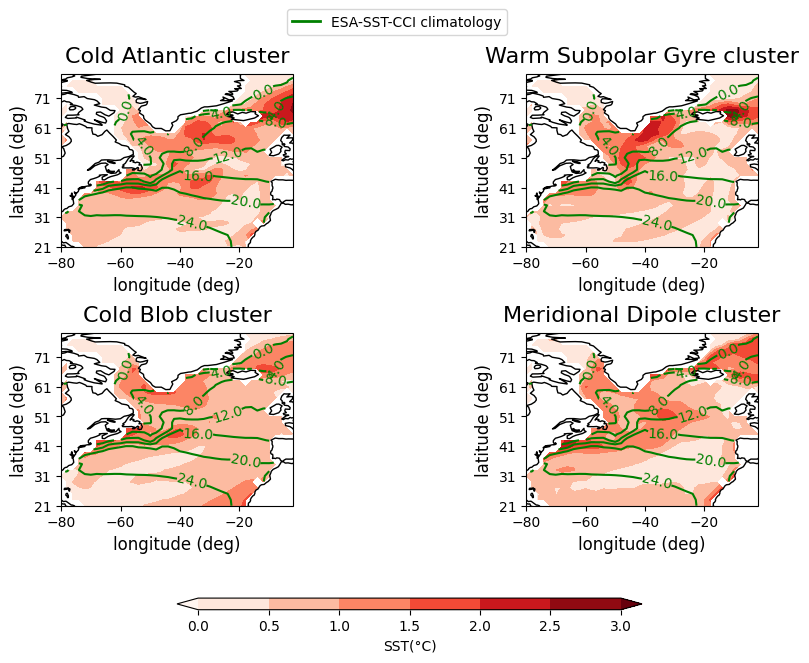

In [14]:
plot_4_std_cluster_tos_bias(list_4_clusters,models,esa_na_seas_mean_tos,(10,8))

/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  resul

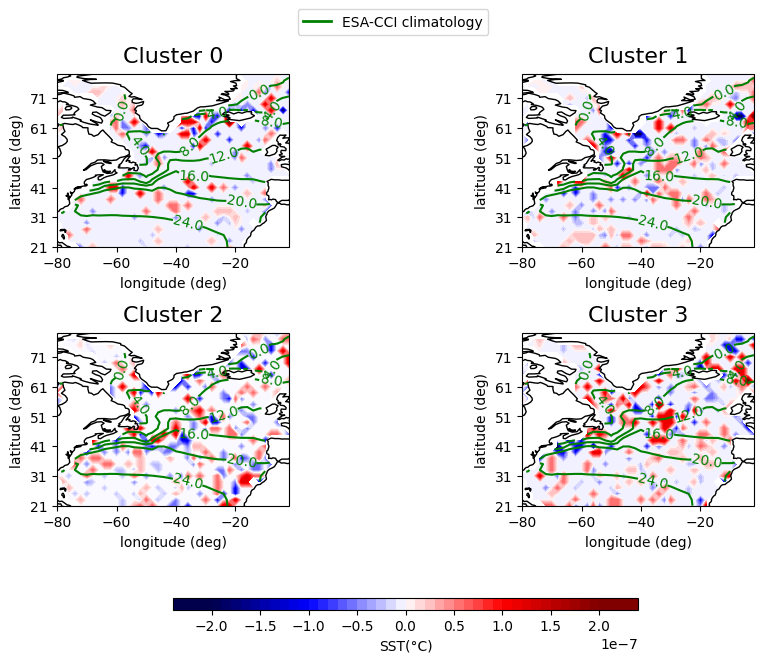

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8), subplot_kw={"projection": ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Spazi tra le subplots

# Calcolo della deviazione standard per ogni cluster con la climatologia della seasonal mean
std_dev_tos = []
# Calcolo della deviazione standard per ogni cluster con la climatologia del bias
std_dev_bias = []
for j in range(len(list_4_clusters)):  # ciclo su tutti i 4 cluster
    # Costruisco il DataArray per il cluster j-esimo
    #cluster = [name_dict[model]['tos North Atlantic seasonal mean DJF'] for model in list_4_clusters[j]]
    cluster_tos = [models[model]['tos North Atlantic seasonal mean DJF'] for model in list_4_clusters[j]]
    #Concatena i modelli lungo una nuova dimensione che è la grandezza del j-esimo cluster
    concat_cluster_tos = xr.concat(cluster_tos, dim='dim_cluster')
    # Calcolo della deviazione standard lungo la nuova dimensione, perché la deviazione standard è valore del singolo modello - multi_cluster_mean
    cluster_std_tos = concat_cluster_tos.std(dim='dim_cluster')
    # Aggiustamento delle coordinate longitudinali
    cluster_std_tos = cluster_std_tos.assign_coords(lon=(np.where(cluster_std_tos.lon >= 280, cluster_std_tos.lon - 360, cluster_std_tos.lon)))
    std_dev_tos.append(cluster_std_tos)

    # Costruisco il DataArray per il cluster j-esimo
    #cluster = [name_dict[model]['tos North Atlantic seasonal mean DJF'] for model in list_4_clusters[j]]
    cluster_bias = [models[model]['North Atlantic bias DJF'] for model in list_4_clusters[j]]
    #Concatena i modelli lungo una nuova dimensione che è la grandezza del j-esimo cluster
    concat_cluster_bias = xr.concat(cluster_bias, dim='dim_cluster')
    # Calcolo della deviazione standard lungo la nuova dimensione, perché la deviazione standard è valore del singolo modello - multi_cluster_mean
    cluster_std_bias = concat_cluster_bias.std(dim='dim_cluster')
    # Aggiustamento delle coordinate longitudinali
    cluster_std_bias = cluster_std_bias.assign_coords(lon=(np.where(cluster_std_bias.lon >= 280, cluster_std_bias.lon - 360, cluster_std_bias.lon)))
    std_dev_bias.append(cluster_std_bias)

    std_dev = std_dev_tos[j] - std_dev_bias[j]

    # Plot
    if j < 2:  # primi 2 cluster (prima riga)
        k = 0
        l = j
    else:  # successivi 2 cluster (seconda riga)
        k = 1
        l = j - 2
    plot_mod = ax[k, l].contourf(std_dev.lon, std_dev.lat, std_dev, cmap='seismic', levels=50, vmin=-2e-7, vmax=2e-7, add_colorbar=False)
    
    # Aggiungo i contorni della climatologia ESA-CCI
    data_esa = esa_na_seas_mean_tos[4]
    contour_esa = ax[k, l].contour(data_esa.lon, data_esa.lat, data_esa, colors='g')
    ax[k, l].clabel(contour_esa, fmt='%1.1f')

    # Valori sugli assi
    ax[k, l].set_xticks(np.arange(std_dev.lon.min(), std_dev.lon.max(), 20))
    ax[k, l].set_yticks(np.arange(std_dev.lat.min(), std_dev.lat.max(), 10))
    ax[k, l].set_ylabel('latitude (deg)')
    ax[k, l].set_xlabel('longitude (deg)')
    ax[k, l].coastlines()
    ax[k, l].set_title(f'Cluster {j}', fontsize=16, y=1.02)

# Creazione di un oggetto Line2D per la legenda
green_line = Line2D([0], [0], color='green', lw=2, label='ESA-CCI climatology')
fig.legend(handles=[green_line], loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)

# Aggiunta della barra colore
fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('SST(°C)')


/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


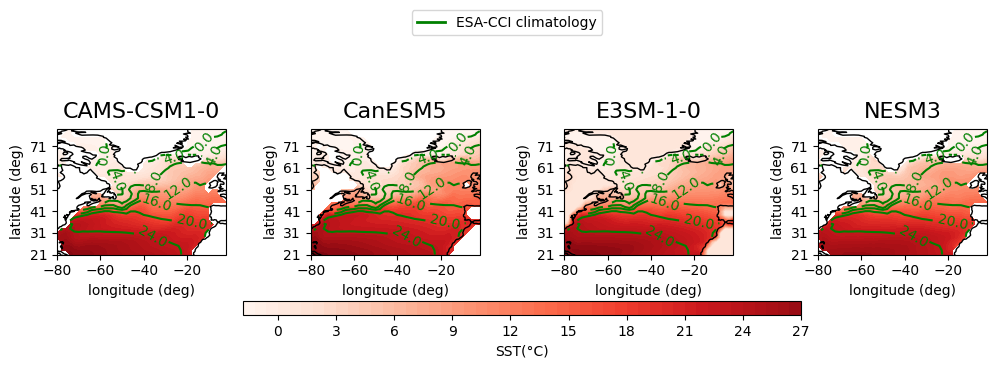

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(12,4), subplot_kw={"projection": ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Spazi tra le subplots

for i in range(len(list_4_clusters[0])):
    dataset = models[list_4_clusters[0][i]]['tos North Atlantic seasonal mean DJF']
    dataset = dataset.assign_coords(lon=(np.where(dataset.lon >= 280, dataset.lon - 360, dataset.lon)))
    plot_mod = ax[i].contourf(dataset.lon, dataset.lat, dataset, cmap='Reds', levels=50, vmin=-2, vmax=30, add_colorbar=False)
    
    # Aggiungo i contorni della climatologia ESA-CCI
    data_esa = esa_na_seas_mean_tos[4]
    contour_esa = ax[i].contour(data_esa.lon, data_esa.lat, data_esa, colors='g')
    ax[i].clabel(contour_esa, fmt='%1.1f')

    # Valori sugli assi
    ax[i].set_xticks(np.arange(dataset.lon.min(), dataset.lon.max(), 20))
    ax[i].set_yticks(np.arange(dataset.lat.min(), dataset.lat.max(), 10))
    ax[i].set_ylabel('latitude (deg)')
    ax[i].set_xlabel('longitude (deg)')
    ax[i].coastlines()
    ax[i].set_title(f'{list_4_clusters[0][i]}', fontsize=16, y=1.02)

# Creazione di un oggetto Line2D per la legenda
green_line = Line2D([0], [0], color='green', lw=2, label='ESA-CCI climatology')
fig.legend(handles=[green_line], loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)

# Aggiunta della barra colore
fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('SST(°C)')

Bias zonal wind 850 hPa

In [17]:
def plot_4_mean_cluster_atmos(list_4_clusters, dataset_seas_mean, fig_size, name_dict, title_pdf):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=fig_size, subplot_kw={"projection": ccrs.PlateCarree()})
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots    
    # Inizializzo sum_bias per il calcolo della media di atmos
    for j in range(len(list_4_clusters)):  # ciclo su tutti i 5 cluster medi
        sum_bias = 0
        for i in range(len(list_4_clusters[j])):  # ciclo sui modelli del cluster j-esimo
            model_name = list_4_clusters[j][i]
            sum_bias += name_dict[model_name]['atmos North Atlantic bias DJF']        
        # Calcolo del valor medio
        mean_bias_atmos = sum_bias / len(list_4_clusters[j])            
        # Plot
        if j < 2:  # primi 3 cluster medi
            k = 0  # indice per le righe --> prima riga
            l = j  # indice per le colonne
        else:
            k = 1  # indice per le righe --> seconda riga
            l = k*j - 2  # indice per le colonne --> l appartiene [0, 1]        
        plot_mod = ax[k, l].contourf(mean_bias_atmos[0].lon, mean_bias_atmos[0].lat, mean_bias_atmos[0], cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
        data_era = dataset_seas_mean[4]
        contour_era = ax[k, l].contour(data_era[0].lon, data_era[0].lat, data_era[0], colors='g')
        ax[k,l].clabel(contour_era, fmt='%1.1f')
        ax[k, l].coastlines()        
        # Valori assi            
        ax[k, l].set_xticks(np.arange(mean_bias_atmos[0].lon.min(), mean_bias_atmos[0].lon.max(), 20))
        ax[k, l].set_yticks(np.arange(mean_bias_atmos[0].lat.min(), mean_bias_atmos[0].lat.max(), 10))
        ax[k, l].set_xlabel('longitude(deg)',fontsize=12)
        ax[k, l].set_ylabel('latitude(deg)',fontsize=12)
        #ax[k, l].set_title(f'Cluster {j}', fontsize=16, y=1.02) 
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)
    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ERA5 climatology')  
    # Aggiungo la legenda al plot
    fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)  
    # Barra del colore
    fig.colorbar(plot_mod, ax=ax.ravel().tolist(), orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')    
    # Titolo
    #fig.suptitle(title_plot, fontsize=16, y=1.02)
    fig.savefig(title_pdf, format='pdf')

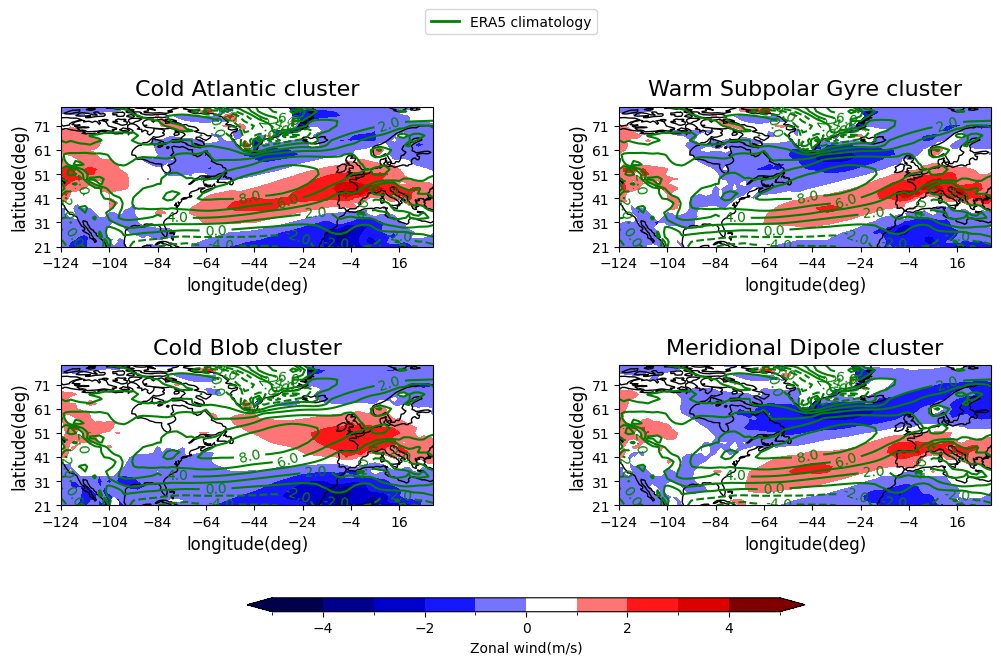

In [18]:
plot_4_mean_cluster_atmos(list_4_clusters,era_na_seas_mean,(12,8),models_atmos,'cluster_mean_atmos.pdf')

Standard deviation bias zonal wind

In [19]:
def plot_4_std_cluster_atmos_bias(list_4_clusters,name_dict,dataset_seas_mean,fig_size): #funzione che plotta la std dei 5 cluster di tos
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=fig_size,subplot_kw={"projection": ccrs.PlateCarree()}) #trasformazione cartografica = lonxlat   
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    
    #Calcolo della multi-cluster mean per ogni cluster
    #multi_cluster_mean = []
    #for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
    #    sum_mc = 0 #Inizializzo la somma per il calcolo della multi model mean
    #    for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
    #        sum_mc = sum_mc + name_dict[name]['atmos North Atlantic seasonal mean DJF'][0] #plev=850hPa
    #    multi_cluster_mean.append(sum_mc / len(list_4_clusters[j]))

    #Calcolo della deviazione standard per ogni cluster
    #Inizializzo la std come una lista in cui andrò ad inserire i 4 valori, uno per ogni cluster
    #std_dev = []
    #for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
    #    dataset = []
    #    diff = 0 #Inizializzo la differenza
    #    for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
    #        dataset.append(name_dict[list_4_clusters[j][i]]['atmos North Atlantic seasonal mean DJF'][0])
    #        diff = diff + (dataset[i] - multi_cluster_mean[j])**2
    #    cluster_std = np.sqrt(diff / len(list_4_clusters[j]))
    #    std_dev.append(cluster_std)
    
    # Calcolo della deviazione standard per ogni cluster
    std_dev = []
    for j in range(len(list_4_clusters)):  # ciclo su tutti i 4 cluster
        # Costruisco il DataArray per il cluster j-esimo
        cluster = [name_dict[model]['atmos North Atlantic bias DJF'][0] for model in list_4_clusters[j]]
        #Concatena i modelli lungo una nuova dimensione che è la grandezza del j-esimo cluster
        concat_cluster = xr.concat(cluster, dim='dim_cluster')
        # Calcolo della deviazione standard lungo la nuova dimensione, perché la deviazione standard è valore del singolo modello - multi_cluster_mean
        cluster_std = concat_cluster.std(dim='dim_cluster')
        std_dev.append(cluster_std)
        if j < 2: #primi 3 cluster medi
            k = 0 #indice per le righe --> prima riga
            l = j #indice per le colonne
        else:
            k = 1 #indice per le righe --> seconda riga
            l = k*j - 2  #indice per le colonne --> l appartiene [0,1]
        #plot_mod = std_dev.plot(ax=ax[k,l],cmap='Reds',vmin=v_min,vmax=v_max, add_colorbar=False)
        plot_mod = ax[k,l].contourf(std_dev[j].lon,std_dev[j].lat,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
        data_era = dataset_seas_mean[4][0]
        contour_era = ax[k, l].contour(data_era.lon, data_era.lat, data_era, colors='g')
        ax[k,l].clabel(contour_era, fmt='%1.1f')
        #valori assi          
        ax[k,l].set_xticks(np.arange(std_dev[j].lon.min(),std_dev[j].lon.max(), 20))
        ax[k,l].set_yticks(np.arange(std_dev[j].lat.min(),std_dev[j].lat.max(), 10))  
        ax[k,l].set_ylabel('latitude(deg)',fontsize=12)
        ax[k,l].set_xlabel('longitude(deg)',fontsize=12)
        ax[k,l].coastlines() #gca = get current axis        
        #ax[k,l].set_title(f'Cluster {j}', fontsize=16, y=1.02)
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)
    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ERA5 climatology')  
    # Aggiungo la legenda al plot
    fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
    # Barra del colore
    fig.colorbar(plot_mod, ax=ax.ravel().tolist(), orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')
    # Titolo 

/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


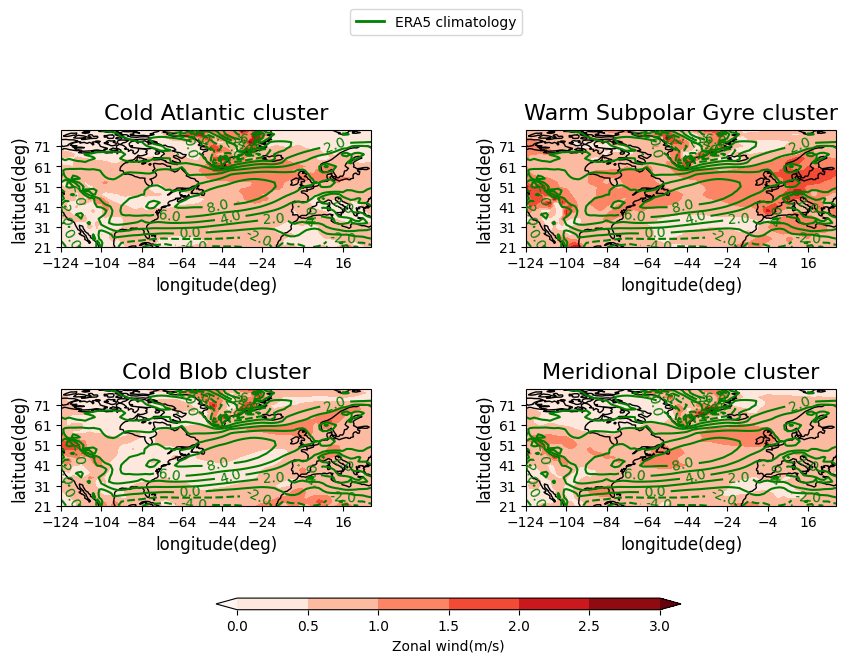

In [20]:
plot_4_std_cluster_atmos_bias(list_4_clusters,models_atmos,era_na_seas_mean,(10,8))

Climatologia ESA-SST-CCI

In [12]:
lon_neg = esa_na_seas_mean_tos[4].sel(lon=slice(280,360), lat=slice(20,80))
lon_neg = lon_neg.assign_coords(lon=(np.where(lon_neg.lon >= 280, lon_neg.lon - 360, lon_neg.lon)))
esa_na_seas_mean_tos[4] = lon_neg

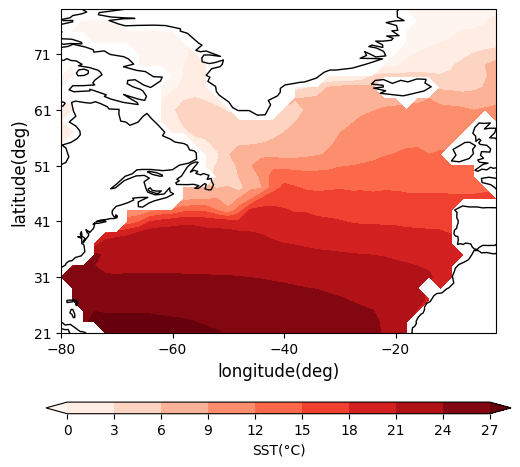

In [21]:
fig,ax=plt.subplots(figsize=(10,6),subplot_kw={"projection": ccrs.PlateCarree()})
data_esa = esa_na_seas_mean_tos[4]
#plot = data_era.plot(ax=ax,cmap='seismic',vmin=-10,vmax=10, add_colorbar=False)
plot = ax.contourf(data_esa.lon,data_esa.lat,data_esa,cmap='Reds', 
                             levels=10, extend='both')
#contour
#contour_esa = data_esa.plot.contour(ax=ax, colors='g')
#ax.clabel(contour_esa, fmt='%1.1f')
ax.coastlines()
#label e valore assi
ax.set_xlabel('longitude(deg)',fontsize=12)
ax.set_ylabel('latitude(deg)',fontsize=12)
ax.set_xticks(np.arange(data_esa.lon.min(),data_esa.lon.max(),20))
ax.set_yticks(np.arange(data_esa.lat.min(),data_esa.lat.max(),10))
fig.colorbar(plot, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('SST(°C)')
#green_line = Line2D([0], [0], color='green', lw=2, label='ESA-SST-CCI climatology') 
#fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
#fig.suptitle('ESA-SST-CCI climatology', fontsize=16, y=1.02)

Plot bias zonmean

In [23]:
def plot_4_mean_cluster_zonmean(list_4_clusters, dataset_seas_mean, fig_size, name_dict,title_pdf): #plot dei 5 cluster medi di zonmean    
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=fig_size)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    #calcolo il valor medio
    for j in range(len(list_4_clusters)): # ciclo su tutti i 5 cluster medi
        #Inizializzo sum_zonmean per il calcolo della media di zonmean
        sum_zonmean = 0
        for i in range(len(list_4_clusters[j])):  # ciclo sui modelli del cluster j-esimo
            model_name = list_4_clusters[j][i]
            zonmean = name_dict[model_name]['zonmean bias DJF']
            zonmean = zonmean.assign_coords({"plev" : zonmean.plev.round()}) #arrotondo in modo tale che i livelli di pressione siano gli stessi per ogni modello
            sum_zonmean = sum_zonmean + zonmean
        #valor medio
        mean_zonmean = sum_zonmean / len(list_4_clusters[j])
        # Plot
        if j < 2:  # primi 3 cluster medi
            k = 0  # indice per le righe --> prima riga
            l = j  # indice per le colonne
        else:
            k = 1  # indice per le righe --> seconda riga
            l = k*j - 2  # indice per le colonne --> l appartiene [0, 1]         
        #plot_mod = mean_zonmean.plot(vmin=v_min, vmax=v_max, cmap='seismic', ax=ax[k,l], add_colorbar=False)
        plot_mod = ax[k,l].contourf(mean_zonmean.sel(lon=0).lat,mean_zonmean.sel(lon=0).plev,mean_zonmean.sel(lon=0),cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
        data_era = dataset_seas_mean[4]
        contour_era = data_era.sel(lon=0).plot.contour(ax=ax[k,l],colors='g')
        ax[k,l].clabel(contour_era, fmt='%1.1f')
        ax[k,l].set_xlabel('latitude(deg)',fontsize=12)
        ax[k,l].set_ylabel('plev(Pa)',fontsize=12)
        ax[k,l].invert_yaxis()
        # Titolo
        #ax[k,l].set_title(f'Cluster {j}', fontsize=16, y=1.02)
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)
   
    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ERA5 climatology')     
    # Aggiungo la legenda al plot
    fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
    # Barra del colore
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')         
    # Titolo
    #fig.suptitle(title_plot, fontsize=16, y=1.02)
    fig.savefig(title_pdf, format='pdf')

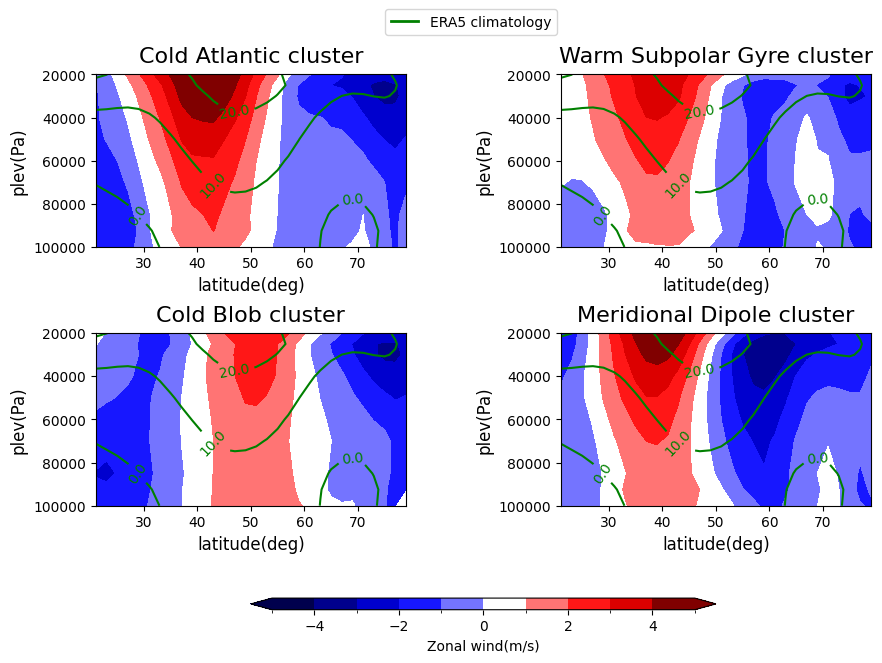

In [24]:
plot_4_mean_cluster_zonmean(list_4_clusters, era_seas_mean, (10,8), models_zonmean, 'cluster_mean_zonmean.pdf')

Standard deviation zonal wind through the entire troposphere (zonmean)

In [25]:
def plot_4_std_cluster_zonmean_bias(list_5_clusters,name_dict,dataset_seas_mean,fig_size): #funzione che plotta la std dei 5 cluster di zonmean
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=fig_size) #trasformazione cartografica = lonxlat   
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Aggiungo spazi verticali tra le subplots
    
    #Calcolo della multi-cluster mean per ogni cluster
    #multi_cluster_mean = []
    #for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
    #    sum_mc = 0 #Inizializzo la somma per il calcolo della multi model mean
    #    for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
    #        sum_mc = sum_mc + name_dict[name]['zonmean seasonal mean DJF'][:,:,0] #lon=0
    #    multi_cluster_mean.append(sum_mc / len(list_4_clusters[j]))

    #Calcolo della deviazione standard per ogni cluster
    #Inizializzo la std come una lista in cui andrò ad inserire i 4 valori, uno per ogni cluster
    #std_dev = []
    #for j in range(len(list_4_clusters)): #ciclo su tutti i 4 cluster medi
    #    dataset = []
    #    diff = 0 #Inizializzo la differenza
    #    for i in range(len(list_4_clusters[j])): #ciclo sui modelli del cluster j-esimo
    #        dataset.append(name_dict[list_4_clusters[j][i]]['zonmean seasonal mean DJF'][:,:,0])
    #        diff = diff + (dataset[i] - multi_cluster_mean[j])**2
    #    cluster_std = np.sqrt(diff / len(list_4_clusters[j]))
    #    std_dev.append(cluster_std)
    
        # Calcolo della deviazione standard per ogni cluster
    std_dev = []
    for j in range(len(list_4_clusters)):  # ciclo su tutti i 4 cluster
        # Costruisco il DataArray per il cluster j-esimo
        cluster = [name_dict[model]['zonmean bias DJF'][:,:,0] for model in list_4_clusters[j]]
        #Concatena i modelli lungo una nuova dimensione che è la grandezza del j-esimo cluster
        concat_cluster = xr.concat(cluster, dim='dim_cluster')
        # Calcolo della deviazione standard lungo la nuova dimensione, perché la deviazione standard è valore del singolo modello - multi_cluster_mean
        cluster_std = concat_cluster.std(dim='dim_cluster')
        std_dev.append(cluster_std)
        #plot
        if j < 2: #primi 3 cluster medi
            k = 0 #indice per le righe --> prima riga
            l = j #indice per le colonne
        else:
            k = 1 #indice per le righe --> seconda riga
            l = k*j - 2  #indice per le colonne --> l appartiene [0,1]
        #plot_mod = std_dev.plot(ax=ax[k,l],cmap='Reds',vmin=v_min,vmax=v_max, add_colorbar=False)
        plot_mod = ax[k,l].contourf(std_dev[j].lat,std_dev[j].plev,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
        data_era = dataset_seas_mean[4]
        contour_era = data_era.sel(lon=0).plot.contour(ax=ax[k,l],colors='g')
        ax[k,l].clabel(contour_era, fmt='%1.1f')
        ax[k,l].set_ylabel('plev(Pa)',fontsize=12)
        ax[k,l].set_xlabel('latitude(deg)',fontsize=12)
        ax[k,l].invert_yaxis()      
        #ax[k,l].set_title(f'Cluster {j}', fontsize=16, y=1.02)
        #title for each cluster
        if j == 0:
            ax[k,l].set_title('Cold Atlantic cluster', fontsize=16, y=1.02)
        elif j == 1:
            ax[k,l].set_title('Warm Subpolar Gyre cluster', fontsize=16, y=1.02)
        elif j == 2:
            ax[k,l].set_title('Cold Blob cluster', fontsize=16, y=1.02)
        elif j == 3:
            ax[k,l].set_title('Meridional Dipole cluster', fontsize=16, y=1.02)
    
    # Creazione di un oggetto Line2D per la legenda
    green_line = Line2D([0], [0], color='green', lw=2, label='ERA5 climatology')     
    # Aggiungo la legenda al plot
    fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
    # Barra del colore
    fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')   
    # Titolo
    #fig.suptitle(title_plot, fontsize=16, y=1.02)
    #fig.savefig(title_pdf, format='pdf')

/tmp/ipykernel_283376/2081111676.py:43: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  plot_mod = ax[k,l].contourf(std_dev[j].lat,std_dev[j].plev,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
/tmp/ipykernel_283376/2081111676.py:43: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  plot_mod = ax[k,l].contourf(std_dev[j].lat,std_dev[j].plev,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
/tmp/ipykernel_283376/2081111676.py:43: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  plot_mod = ax[k,l].contourf(std_dev[j].lat,std_dev[j].plev,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds',add_colorbar=True, extend='both')
/tmp/ipykernel_283376/2081111676.py:43: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  plot_mod = ax[k,l].contourf(std_dev[j].lat,std_dev[j].plev,std_dev[j],levels=np.linspace(0,3,7),cmap='Reds

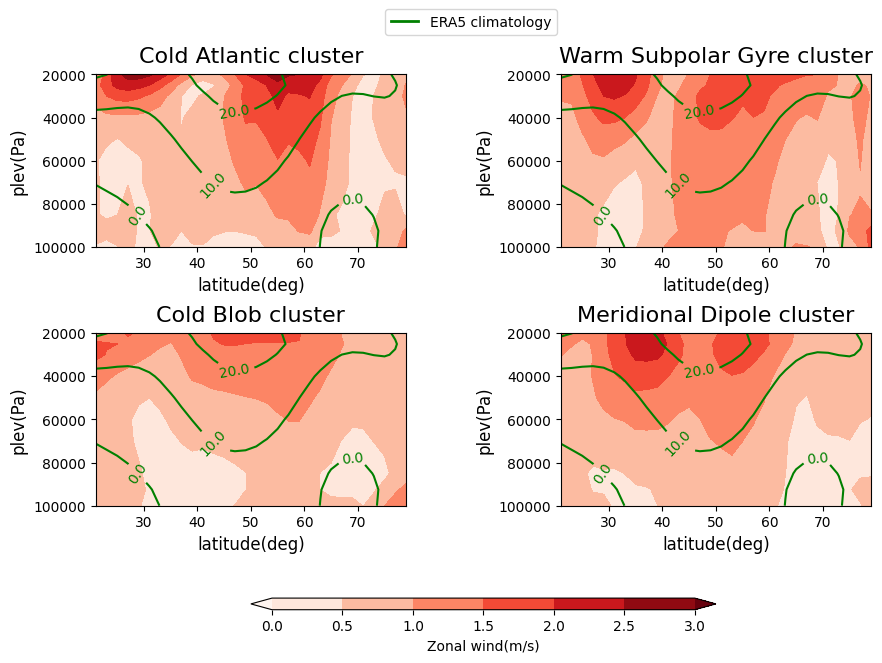

In [26]:
plot_4_std_cluster_zonmean_bias(list_4_clusters,models_zonmean,era_seas_mean,(10,8))

Climatologia ERA5 di tutta la troposfera

/tmp/ipykernel_283376/3667719246.py:4: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  plot = ax.contourf(data_era.lat,data_era.plev,data_era,cmap='seismic',levels=50, add_colorbar=False)


Text(0.5, 1.02, 'ERA5 climatology of the entire troposphere')

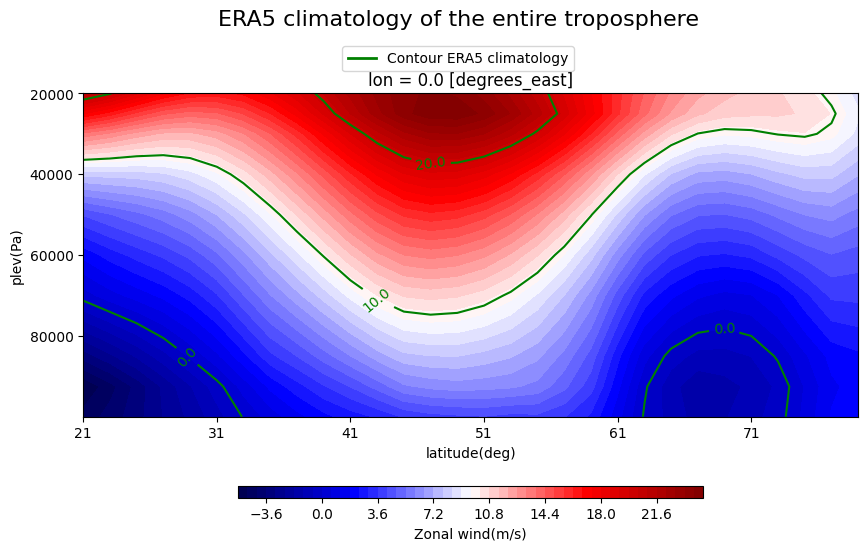

In [27]:
fig,ax=plt.subplots(figsize=(10,6))
data_era = era_seas_mean[4][:,:,0]
#plot = data_era.plot(ax=ax,cmap='seismic',vmin=-10,vmax=10, add_colorbar=False)
plot = ax.contourf(data_era.lat,data_era.plev,data_era,cmap='seismic',levels=50, add_colorbar=False)
#contour
contour_era = data_era.plot.contour(ax=ax, colors='g')
ax.clabel(contour_era, fmt='%1.1f')
#label e valore assi
ax.set_xlabel('latitude(deg)')
ax.set_ylabel('plev(Pa)')
ax.invert_yaxis() 
ax.set_xticks(np.arange(data_era.lat.min(),data_era.lat.max(),10))
ax.set_yticks(np.arange(data_era.plev.min(),data_era.plev.max(),20000))
fig.colorbar(plot, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')
green_line = Line2D([0], [0], color='green', lw=2, label='Contour ERA5 climatology') 
fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
fig.suptitle('ERA5 climatology of the entire troposphere', fontsize=16, y=1.02)

Plot generico per ogni cluster

In [28]:
import matplotlib.colors as mcolors

# Define the seismic colormap and modify to have white between 0 and 0.5
seismic_cmap_sx = plt.get_cmap('seismic',12)
seismic_cmap_dx = plt.get_cmap('seismic', 11)  # 11 colors (for the 10 intervals)
colors_sx = seismic_cmap_sx(np.linspace(0,1,12))
colors_dx = seismic_cmap_dx(np.linspace(0, 1, 11))  # Extract colors from the seismic colormap

# Modify the colormap to have white for the [0, 0.5] range
colors_sx[6] = [1,1,1,1]
colors_dx[5] = [1, 1, 1, 1]  # Set the middle color to white

# Create the custom colormap
custom_cmap_sx = mcolors.ListedColormap(colors_sx)
custom_cmap_dx = mcolors.ListedColormap(colors_dx)

# Define custom boundaries
#Zonal wind at 850 hPa and throughout the troposphere --> considering the bias plot
cmap_bounds_sx = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
norm_sx = mcolors.BoundaryNorm(cmap_bounds_sx, custom_cmap_sx.N)
#Zonal wind at 850 hPa and throughout the troposphere --> considering the anomaly plot
cmap_bounds_dx_atmos = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]
norm_dx_atmos = mcolors.BoundaryNorm(cmap_bounds_dx_atmos, custom_cmap_dx.N)
#EGR --> considering the anomaly plot
cmap_bounds_dx_egr = [-0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1]
norm_dx_egr = mcolors.BoundaryNorm(cmap_bounds_dx_egr, custom_cmap_dx.N)



In [29]:
def plot_results_one_cluster(list_4_cluster_number,diff_cluster_atmos,matrix10_cluster_atmos,array_mean_cluster_atmos,diff_cluster_zonmean,matrix10_cluster_zonmean,array_mean_cluster_zonmean,diff_cluster_egr,matrix10_cluster_egr,array_mean_cluster_egr,fig_size,number_cluster,color_scale=(-6,6),color_scale_zonmean=(-6,6),color_scale_egr=(-0.4,0.4)):
    #fig, ax = plt.subplots(nrows=3,ncols=2,figsize=fig_size,subplot_kw={"projection": ccrs.PlateCarree()})
    fig = plt.figure(figsize=fig_size)
    fig.subplots_adjust(hspace=0.8, wspace=0.3)
    #Definisco la colormap
    cmap='seismic'
    levels=50
    #ax[0,0]: bias zonal wind 850 hPa
    ax0 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
    sum_bias = 0
    for i in range(len(list_4_cluster_number)):  # ciclo sui modelli del cluster j-esimo
        model_name = list_4_cluster_number[i]
        sum_bias += models_atmos[model_name]['atmos North Atlantic bias DJF']        
    # Calcolo del valor medio
    mean_bias_atmos = sum_bias / len(list_4_cluster_number)            
    #plot00 = ax0.contourf(mean_bias_atmos[0].lon, mean_bias_atmos[0].lat, mean_bias_atmos[0], vmin=color_scale[0], vmax=color_scale[1], cmap=cmap, levels=levels)
    plot00 = ax0.contourf(mean_bias_atmos[0].lon, mean_bias_atmos[0].lat, mean_bias_atmos[0], cmap=custom_cmap_sx, 
                             levels=cmap_bounds_sx, norm=norm_sx, extend='both')
    data_era = era_na_seas_mean[4]
    contour_era = ax0.contour(data_era[0].lon, data_era[0].lat, data_era[0], colors='g')
    ax0.clabel(contour_era, fmt='%1.1f')
    ax0.coastlines()        
    # Valori assi            
    ax0.set_xticks(np.arange(mean_bias_atmos[0].lon.min(), mean_bias_atmos[0].lon.max(), 20))
    ax0.set_yticks(np.arange(mean_bias_atmos[0].lat.min(), mean_bias_atmos[0].lat.max(), 10))
    ax0.set_xlabel('longitude(deg)',fontsize=12)
    ax0.set_ylabel('latitude(deg)',fontsize=12)
    ax0.set_title(f'Zonal wind bias 850 hPa')
    fig.colorbar(plot00, ax=ax0, orientation='vertical').set_label('Zonal wind(m/s)')

    #ax[0,1]: bootstrap zonal wind
    ax1 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
    lon = diff_cluster_atmos.lon
    lat=diff_cluster_atmos.lat
    plot01 = ax1.contourf(diff_cluster_atmos.lon, diff_cluster_atmos.lat, diff_cluster_atmos,cmap=custom_cmap_dx, 
                             levels=cmap_bounds_dx_atmos, norm=norm_dx_atmos, extend='both')
    coords = np.where(matrix10_cluster_atmos == 1) #array di valori di longitudini e latitudini in cui matrix10 = 1
    # Plot dei punti solo dove matrix10 è uguale a 1
    ax1.plot(diff_cluster_atmos.lon[coords[1]], diff_cluster_atmos.lat[coords[0]], marker='o',color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
    contour_models = ax1.contour(lon,lat, array_mean_cluster_atmos, colors='green') #lon,lat
    ax1.clabel(contour_models, fmt='%1.1f')
    ax1.set_xticks(np.arange(diff_cluster_atmos.lon.min(),diff_cluster_atmos.lon.max(), 20))
    ax1.set_yticks(np.arange(diff_cluster_atmos.lat.min(),diff_cluster_atmos.lat.max(), 10))
    ax1.coastlines() #gca = get current axis
    ax1.set_ylabel('latitude(deg)',fontsize=12)
    ax1.set_xlabel('longitude(deg)',fontsize=12)
    ax1.set_title(f'Zonal wind anomaly 850 hPa')
    fig.colorbar(plot01, ax=ax1, orientation='vertical').set_label('Zonal wind(m/s)')

    #ax[1,0]: bias zonmean zonal wind
    ax2 = fig.add_subplot(3, 2, 3)
    sum_zonmean = 0
    for i in range(len(list_4_cluster_number)):  # ciclo sui modelli del cluster j-esimo
        model_name = list_4_cluster_number[i]
        zonmean = models_zonmean[model_name]['zonmean bias DJF']
        zonmean = zonmean.assign_coords({"plev" : zonmean.plev.round()}) #arrotondo in modo tale che i livelli di pressione siano gli stessi per ogni modello
        sum_zonmean = sum_zonmean + zonmean
    #valor medio
    mean_zonmean = sum_zonmean / len(list_4_cluster_number)
    plot10 = ax2.contourf(mean_zonmean.lat, mean_zonmean.plev, mean_zonmean[:,:,0], cmap=custom_cmap_sx, 
                             levels=cmap_bounds_sx, norm=norm_sx, extend='both')
    data_era = era_seas_mean[4]
    contour_era = ax2.contour(data_era.lat, data_era.plev, data_era.sel(lon=0), colors='g')
    ax2.clabel(contour_era, fmt='%1.1f')
    ax2.set_xlabel('latitude(deg)',fontsize=12)
    ax2.set_ylabel('plev(Pa)',fontsize=12)
    ax2.set_title(f'Tropospheric zonal wind bias') 
    ax2.invert_yaxis()
    fig.colorbar(plot10, ax=ax2, orientation='vertical').set_label('Zonal wind(m/s)')

    #ax[1,1]: bootstrap zonmean zonal wind
    ax3 = fig.add_subplot(3, 2, 4)
    lat=diff_cluster_zonmean.lat
    plev=diff_cluster_zonmean.plev
    plot11 = ax3.contourf(diff_cluster_zonmean.lat, diff_cluster_zonmean.plev, diff_cluster_zonmean,cmap=custom_cmap_dx, 
                             levels=cmap_bounds_dx_atmos, norm=norm_dx_atmos, extend='both')
    coords = np.where(matrix10_cluster_zonmean == 1) #array di valori di longitudini e latitudini in cui matrix10 = 1
    # Plot dei punti solo dove matrix10 è uguale a 1
    ax3.plot(diff_cluster_zonmean.lat[coords[1]], diff_cluster_zonmean.plev[coords[0]], marker='o', color='black', markersize=0.5, linestyle='None')
    contour_models = ax3.contour(lat,plev, array_mean_cluster_zonmean, colors='g') #lat,plev
    ax3.clabel(contour_models, fmt='%1.1f')
    ax3.invert_yaxis() 
    ax3.set_xticks(np.arange(diff_cluster_zonmean.lat.min(),diff_cluster_zonmean.lat.max(), 10))
    ax3.set_yticks(np.arange(diff_cluster_zonmean.plev.min(),diff_cluster_zonmean.plev.max(), 20000))
    ax3.set_ylabel('plev(Pa)',fontsize=12)
    ax3.set_xlabel('latitude(deg)',fontsize=12)
    ax3.set_title(f'Tropospheric zonal wind anomaly')
    fig.colorbar(plot11, ax=ax3, orientation='vertical').set_label('Zonal wind(m/s)')  

    #ax[2,1]: bootstrap EGR 850hPa
    ax5 = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree())
    lon=diff_cluster_egr.lon
    lat=diff_cluster_egr.lat
    plot21 = ax5.contourf(diff_cluster_egr.lon, diff_cluster_egr.lat, diff_cluster_egr,cmap=custom_cmap_dx, 
                             levels=cmap_bounds_dx_egr, norm=norm_dx_egr, extend='both') 
    coords = np.where(matrix10_cluster_egr == 1) #array di valori di longitudini e latitudini in cui matrix10 = 1
    # Plot dei punti solo dove matrix10 è uguale a 1
    ax5.plot(diff_cluster_egr.lon[coords[1]], diff_cluster_egr.lat[coords[0]], marker='o', color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
    contour_models = ax5.contour(lon,lat, array_mean_cluster_egr, colors='g') #lon,lat
    ax5.clabel(contour_models, fmt='%1.1f')
    ax5.set_xticks(np.arange(diff_cluster_egr.lon.min(),diff_cluster_egr.lon.max(), 20))
    ax5.set_yticks(np.arange(diff_cluster_egr.lat.min(),diff_cluster_egr.lat.max(), 10))
    ax5.coastlines()
    ax5.set_ylabel('latitude(deg)',fontsize=12)
    ax5.set_xlabel('longitude(deg)',fontsize=12)
    ax5.set_title(f'EGR anomaly 850 hPa')
    fig.colorbar(plot21, ax=ax5, orientation='vertical').set_label('Eady Growth Rate Max(1/day)')
    
    
    green_line_sx = Line2D([0], [0], color='green', lw=2, label='ERA5 climatology')  
    fig.legend(handles=[green_line_sx],loc='upper left', bbox_to_anchor=(0.15, 0.97), ncol=1)
    
    green_line_dx = Line2D([0], [0], color='green', lw=2, label='Multi model mean')  
    fig.legend(handles=[green_line_dx],loc='upper right', bbox_to_anchor=(0.75, 0.97), ncol=1)
    fig.suptitle(f'Cluster {number_cluster}', fontsize=16, y=1.02)



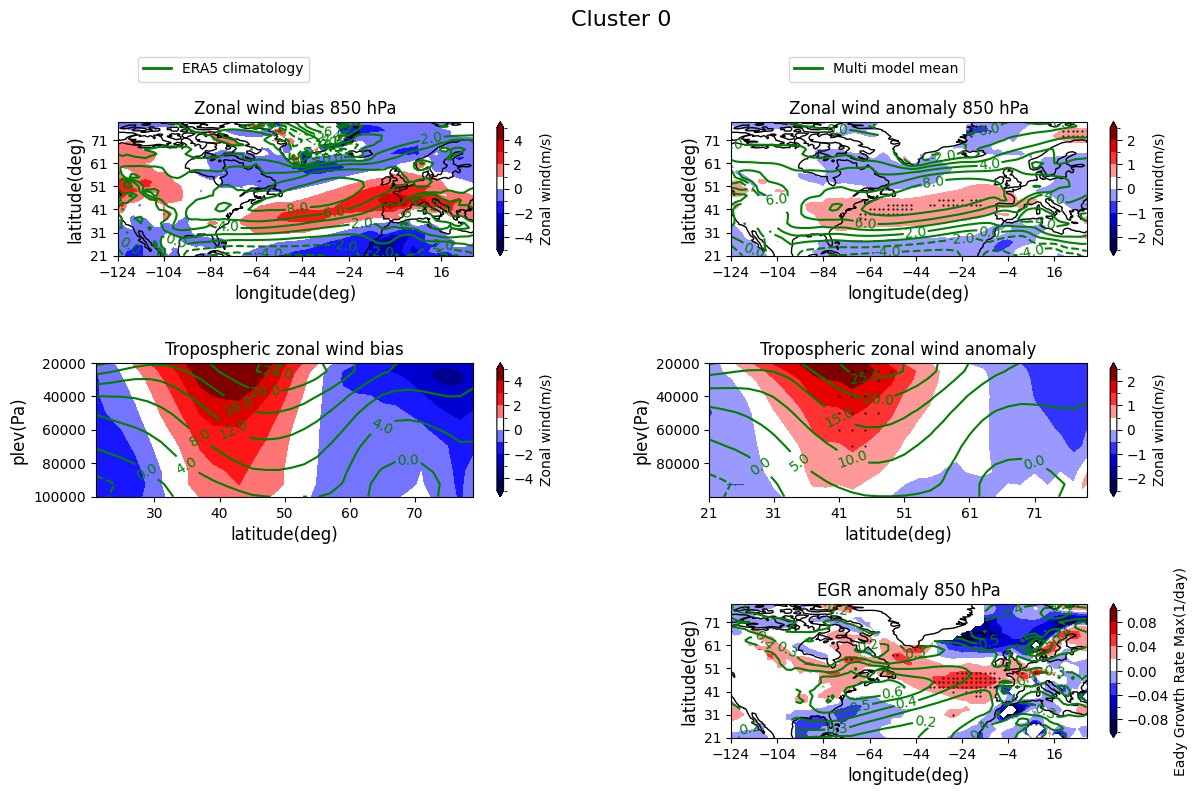

In [30]:
#Cluster 0
plot_results_one_cluster(list_4_clusters[0],diff_cluster0,matrix10_cluster0,array_mean_cluster0,diff_cluster0_zonmean,matrix10_cluster0_zonmean,array_mean_cluster0_zonmean,diff_cluster0_egr,matrix10_cluster0_egr,array_mean_cluster0_egr,(14,8),0)
    

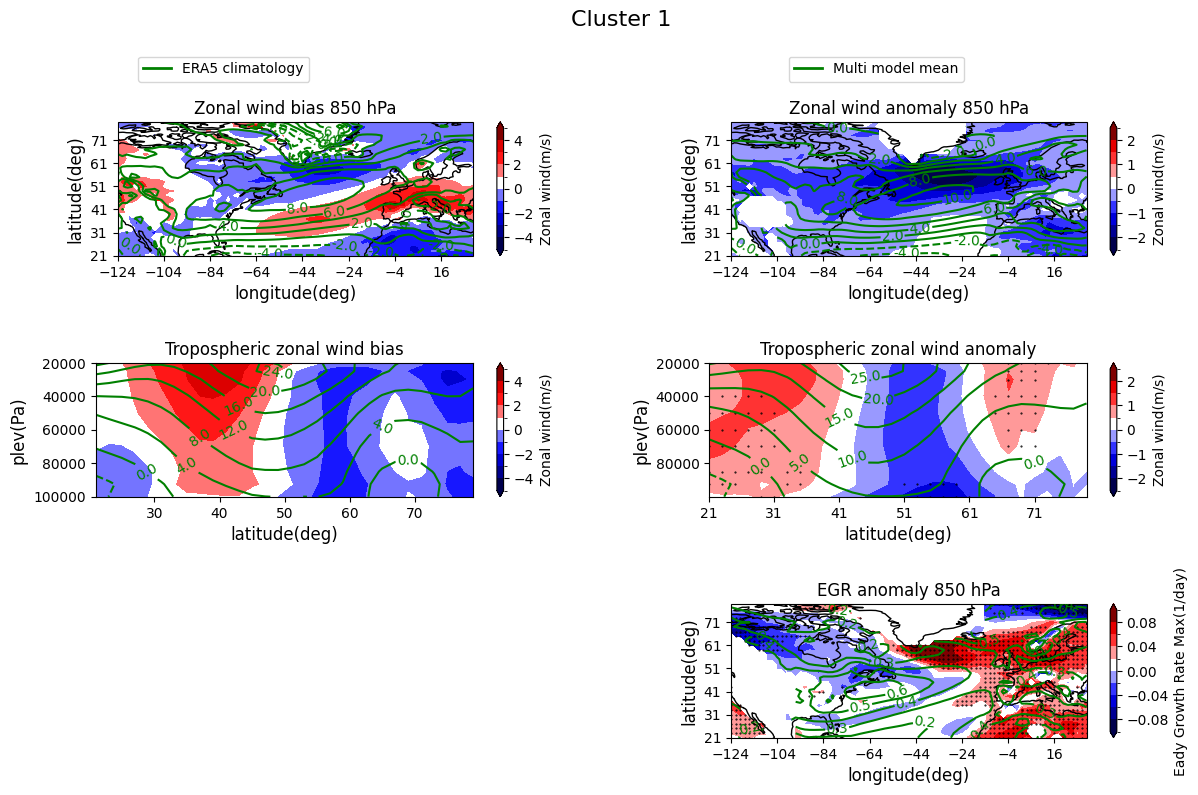

In [31]:
#Cluster 1
plot_results_one_cluster(list_4_clusters[1],diff_cluster1,matrix10_cluster1,array_mean_cluster1,diff_cluster1_zonmean,matrix10_cluster1_zonmean,array_mean_cluster1_zonmean,diff_cluster1_egr,matrix10_cluster1_egr,array_mean_cluster1_egr,(14,8),1)
    

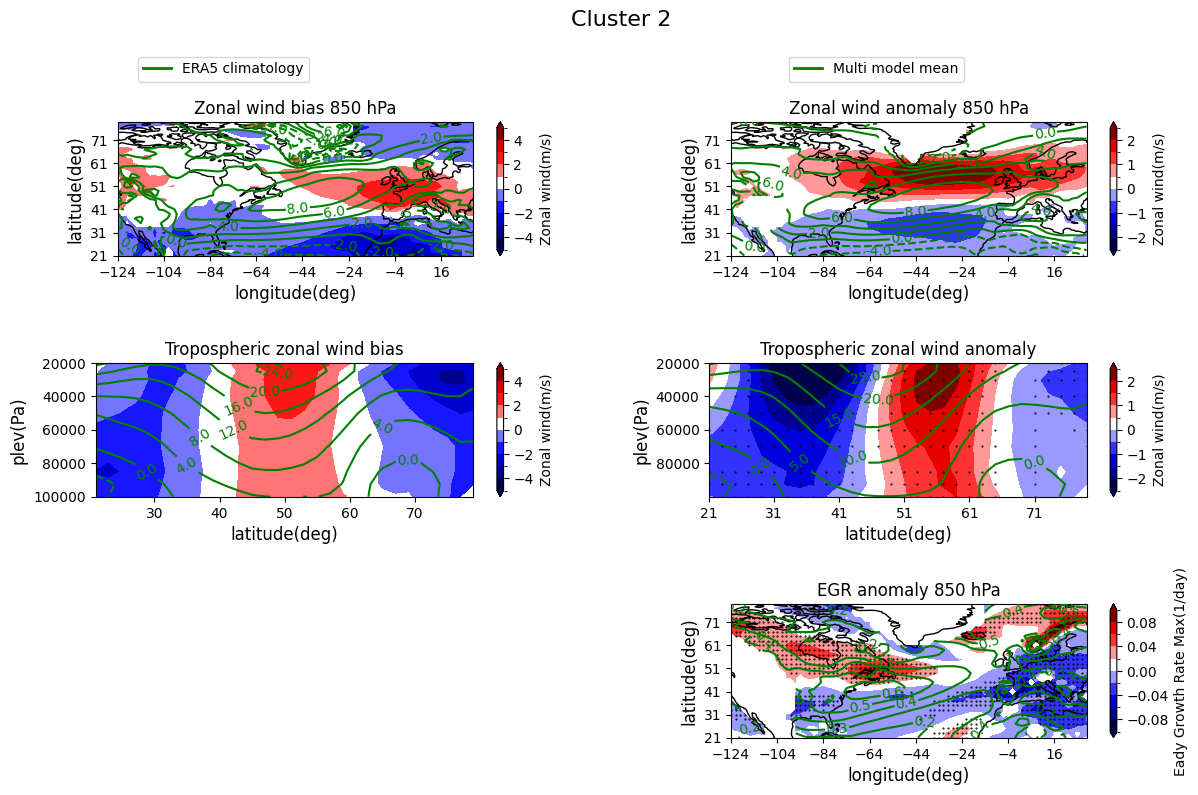

In [32]:
#Cluster 2
plot_results_one_cluster(list_4_clusters[2],diff_cluster2,matrix10_cluster2,array_mean_cluster2,diff_cluster2_zonmean,matrix10_cluster2_zonmean,array_mean_cluster2_zonmean,diff_cluster2_egr,matrix10_cluster2_egr,array_mean_cluster2_egr,(14,8),2)
    

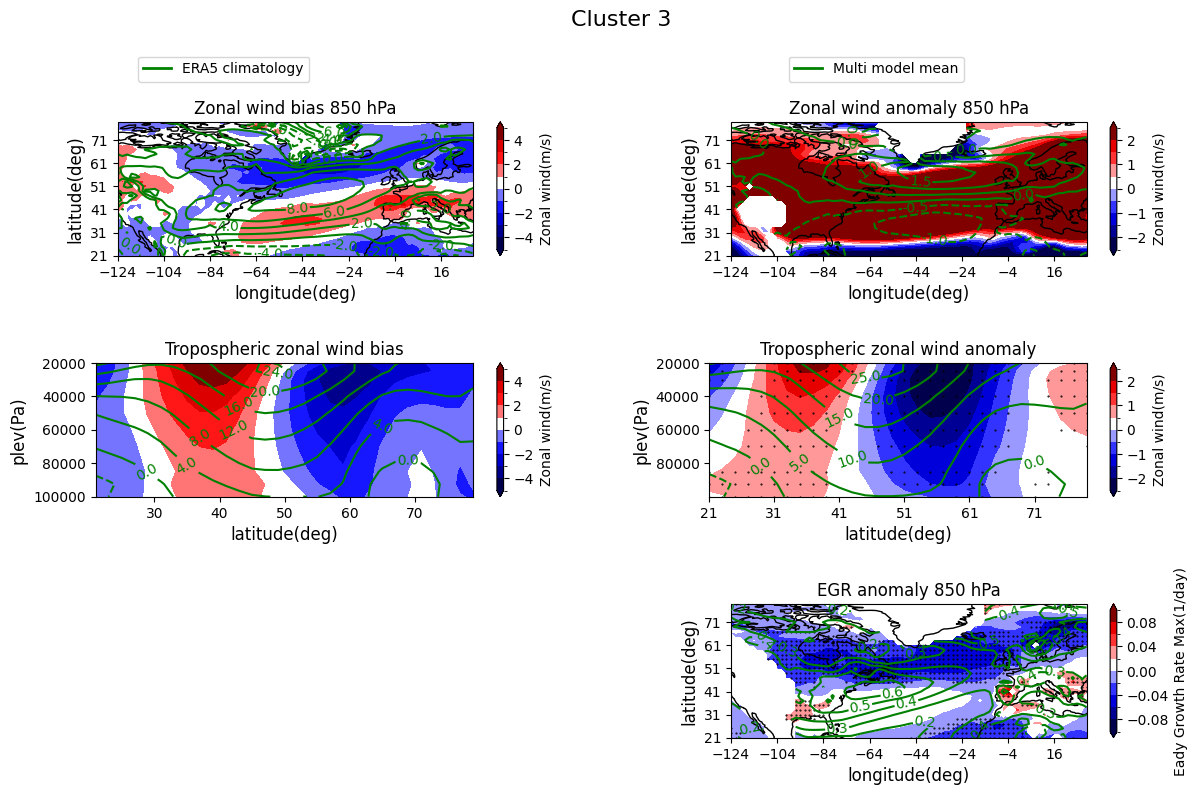

In [33]:
#Cluster 3
plot_results_one_cluster(list_4_clusters[3],diff_cluster3,matrix10_cluster3,array_mean_cluster3,diff_cluster3_zonmean,matrix10_cluster3_zonmean,array_mean_cluster3_zonmean,diff_cluster3_egr,matrix10_cluster3_egr,array_mean_cluster3_egr,(14,8),3)
    